# Pymaceuticals Inc.
---

### Analysis

- In the most recent study, 10 different drugs were screened for potential treatments for squamous cell carcinoma (SCC). Drugs named Capomulin and Ramicane have been tested on the largest number of mice. 
- The distribution of male and female mice in the mice tested is almost equal (male being 51%, femaile being 49%).
- Based on the test results of mouse # l509, Capomulin has significantly reduced the tumor volume over time.
- Based on the distrubution of the tumor volume for each treatment group, Capomulin and Ramicane have demonstrated to be more efficient in the cancer treatment. 
- Based on the study data, there is a possitive correlation between mouse weight and tumor volume (0.84). This supports a theory that mice weight affects tumor volume. 

 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,
                        how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = len(combined_data["Mouse ID"].unique())
drug_count = len(combined_data["Drug Regimen"].unique())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mice_duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicated_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_data[combined_data["Mouse ID"].isin(mice_duplicates)==False]
clean_mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_mice_data["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = clean_mice_data.groupby("Drug Regimen")

summary_stats_mean = summary_df["Tumor Volume (mm3)"].mean()
summary_stats_median = summary_df["Tumor Volume (mm3)"].median()
summary_stats_sd = summary_df["Tumor Volume (mm3)"].std()
summary_stats_var = summary_df["Tumor Volume (mm3)"].var()
summary_stats_sem = summary_df["Tumor Volume (mm3)"].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": summary_stats_mean,
    "Median Tumor Volume": summary_stats_median,
    "Tumor Volume Variacne ": summary_stats_var,
    "Tumor Volume Std. Dev.": summary_stats_sd,
    "Tumor Volume Std. Err.": summary_stats_sem
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variacne,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats_agg = clean_mice_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


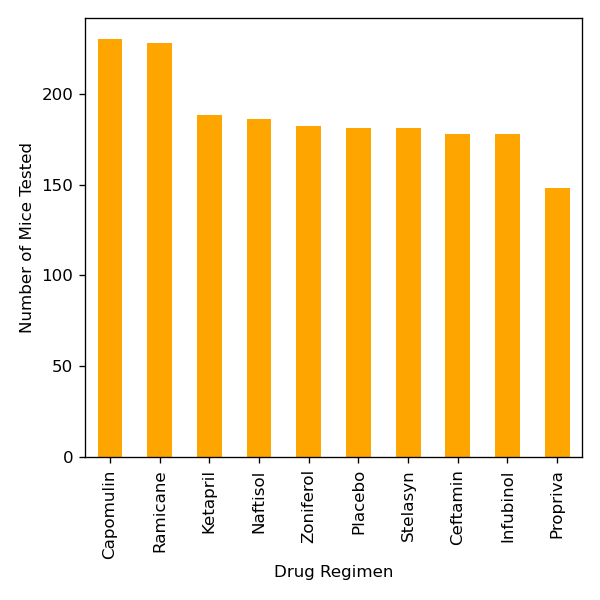

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints  = clean_mice_data["Drug Regimen"].value_counts()

pandas_mice_chart = plt.figure(figsize=(5,5))
pandas_mice_chart = total_timepoints.plot(kind='bar', color='orange')
pandas_mice_chart.set_xlabel("Drug Regimen")
pandas_mice_chart.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


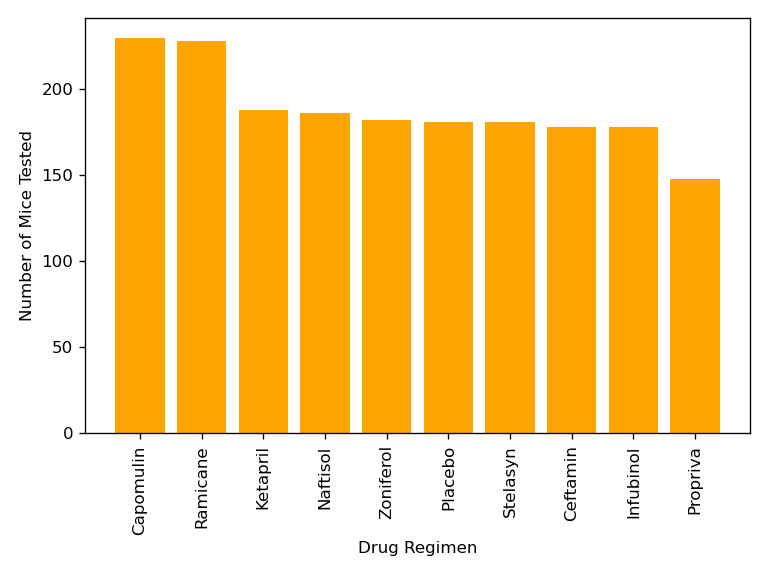

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig1, pyplot_mice_chart = plt.subplots()

#x_axis = np.arange(len(total_timepoints))
x_axis = total_timepoints.index.values
y_axis = total_timepoints.values

pyplot_mice_chart = plt.bar(x_axis, y_axis, color='orange', align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


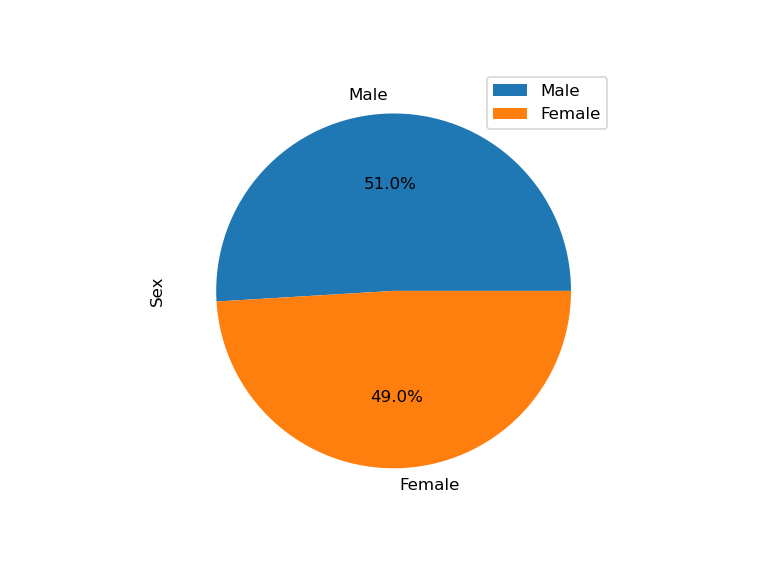

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = pd.DataFrame(clean_mice_data["Sex"].value_counts())
mice_sex.plot.pie(y = "Sex", autopct= "%1.1f%%")
plt.show()

<IPython.core.display.Javascript object>


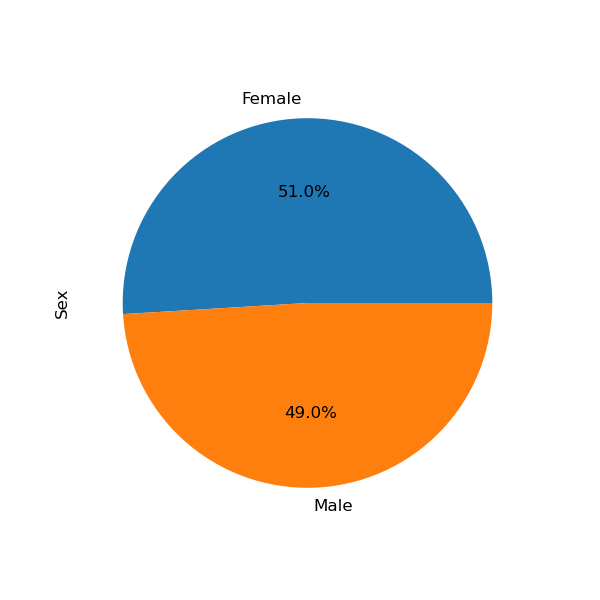

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sex_plot = plt.figure(figsize=(5,5))
sex_plot = plt.pie(mice_sex["Sex"], labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

clean_mice_data = clean_mice_data.sort_values(["Mouse ID", "Timepoint"])
tumor_size_final = pd.DataFrame(clean_mice_data.drop_duplicates(subset = ("Mouse ID"), keep = "last"))
tumor_size_final = tumor_size_final.sort_values("Timepoint")

tumor_capomulin = tumor_size_final.loc[tumor_size_final["Drug Regimen"] == "Capomulin"]
tumor_ramicane = tumor_size_final.loc[tumor_size_final["Drug Regimen"] == "Ramicane"]
tumor_infubinol = tumor_size_final.loc[tumor_size_final["Drug Regimen"] == "Infubinol"]
tumor_ceftamin = tumor_size_final.loc[tumor_size_final["Drug Regimen"] == "Ceftamin"]

# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

drugs_reduced = tumor_size_final[tumor_size_final["Drug Regimen"].isin(drugs_list)]
drugs_reduced = drugs_reduced.reset_index()
drugs_reduced

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,594,b447,Ceftamin,Male,2,30,0,45.000000,0
1,1743,x226,Ceftamin,Male,23,28,0,45.000000,0
2,1551,t573,Ceftamin,Female,15,27,0,45.000000,0
3,1583,u153,Ceftamin,Female,11,25,0,45.000000,0
4,1205,m756,Infubinol,Male,19,30,5,47.010364,1
...,...,...,...,...,...,...,...,...,...
95,9,k403,Ramicane,Male,21,16,45,22.050126,1
96,1053,k483,Infubinol,Female,20,30,45,66.196912,3
97,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
98,380,l509,Capomulin,Male,17,21,45,41.483008,3


In [15]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
    
for drug in drugs_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = drugs_reduced.loc[drugs_reduced["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_data.append(final_tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

     # Print out the result
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 7    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


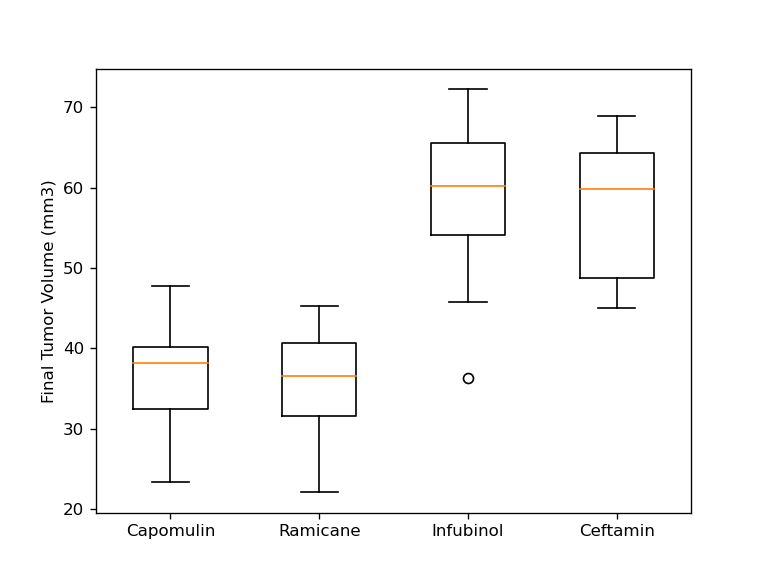

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, box_plot_mice = plt.subplots()
box_plot_mice.set_ylabel("Final Tumor Volume (mm3)")
box_plot_mice.boxplot(tumor_vol_data, labels=drugs_list, widths = 0.5)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


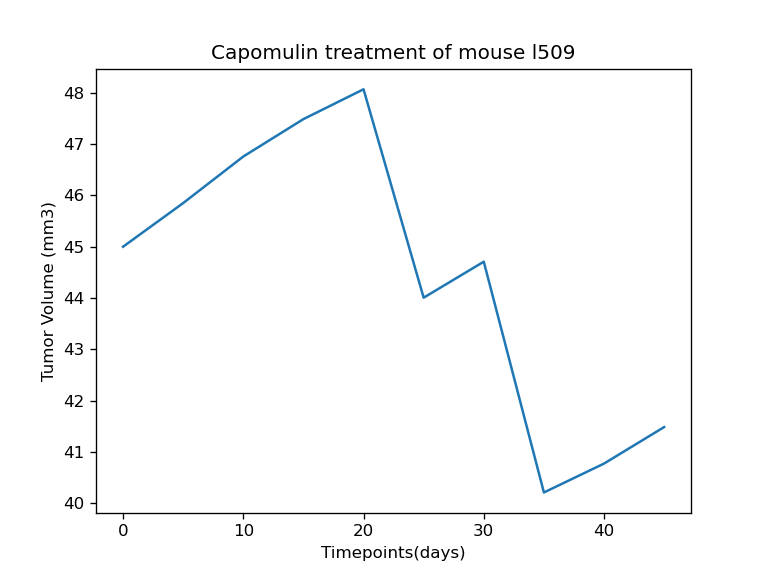

Text(0, 0.5, 'Tumor Volume (mm3)')

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"] == "l509",:]

capomulin_time = capomulin_mouse["Timepoint"]
capomulin_tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

fig1, line_mice_time = plt.subplots()
line_mice_time = plt.plot(capomulin_time, capomulin_tumor_volume)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoints(days)")
plt.ylabel("Tumor Volume (mm3)")

<IPython.core.display.Javascript object>


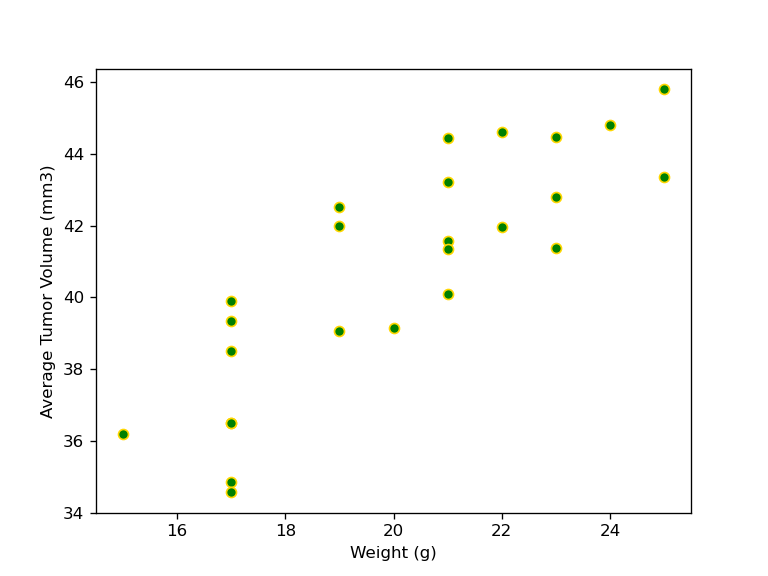

Text(0, 0.5, 'Average Tumor Volume (mm3)')

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
avg_mice_data = capomulin.groupby(["Mouse ID"]).mean()

fig1, scatter_tumor_weight = plt.subplots()
scatter_tumor_weight = plt.scatter(avg_mice_data["Weight (g)"], avg_mice_data["Tumor Volume (mm3)"], 
                                   marker="o", facecolors="green", edgecolors="gold")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_mice_data["Weight (g)"], avg_mice_data["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

The correlation between mouse weight and the average tumor volume is 0.84


<IPython.core.display.Javascript object>


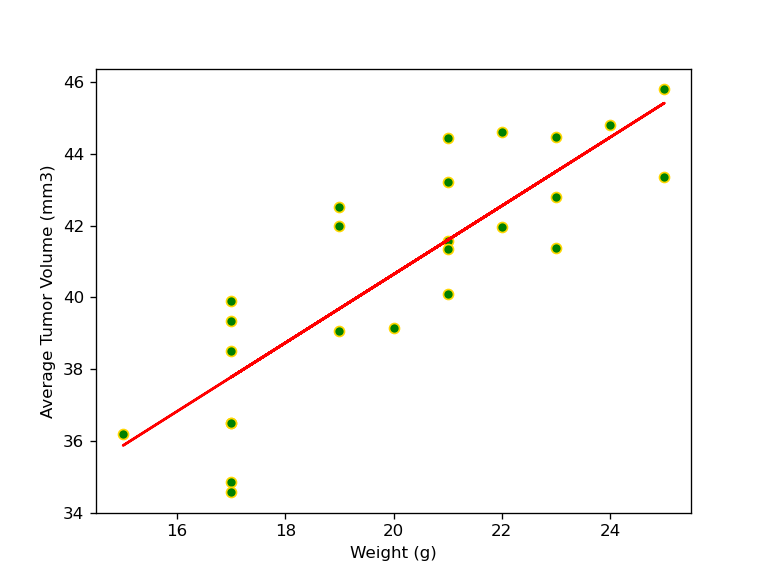

Text(0, 50, 'y = 0.95x + 21.55')

In [20]:
fig1, scatter_tumor_weight = plt.subplots()
scatter_tumor_weight = plt.scatter(avg_mice_data["Weight (g)"], avg_mice_data["Tumor Volume (mm3)"], 
                                   marker="o", facecolors="green", edgecolors="gold")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_mice_data["Weight (g)"], avg_mice_data["Tumor Volume (mm3)"])
regress_values = avg_mice_data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(avg_mice_data["Weight (g)"], regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
